# Clustering States Into Zones Based on Vulnerability of Population to Covid -19
## Using K Means Clustering


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(15.7,8.27)})

## Importing Dataset

In [ ]:
df=pd.read_excel('state_wise_updated.xlsx')

In [ ]:
df.head()

,State,Unnamed: 1,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population,Density,0-4,2020-05-09 00:00:00,2020-10-14 00:00:00,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+,Health Workers(%)
0,Total,NaN,10169804,9739332,147379,280310,25-12-2020 23:29,2783,TT,22336,22134,251,NaN,1.397322e+09,382.0,112806778.0,126928126.0,132709212.0,120526449.0,111424222.0,101413965.0,88594951.0,85140684.0,72438112.0,62318327.0,49069254.0,39146055.0,37663707.0,26454983.0,19208842.0,9232503.0,11289005.0,NaN
1,Maharashtra,NaN,1913382,1806298,49129,56823,25-12-2020 22:43,1132,MH,3431,1427,71,NaN,1.208373e+08,365.0,9362026.0,9820654.0,10734535.0,10627267.0,11090966.0,10147113.0,8796307.0,8247160.0,7196089.0,6032454.0,4919317.0,3885814.0,3642480.0,3078352.0,2143136.0,1062773.0,1180194.0,13.67
2,Karnataka,NaN,914488,888917,12044,13508,25-12-2020 20:23,19,KA,1005,1102,5,NaN,6.616589e+07,319.0,5046719.0,5241509.0,5736646.0,5827277.0,6052558.0,5771606.0,4698380.0,4695451.0,3826712.0,3519782.0,2699270.0,2142504.0,2060052.0,1520119.0,1061125.0,524426.0,625310.0,5.27
3,Andhra Pradesh,NaN,880430,869478,7091,3861,25-12-2020 19:09,0,AP,355,354,2,NaN,5.288316e+07,308.0,6284765.0,7304432.0,8201595.0,8093747.0,8132094.0,7799036.0,6584371.0,6507339.0,5399473.0,4657269.0,3657386.0,2909598.0,3199837.0,2167854.0,1519358.0,636989.0,754203.0,7.83
4,Tamil Nadu,NaN,812142,790965,12048,9129,25-12-2020 19:30,0,TN,1027,1103,12,NaN,7.648154e+07,555.0,5278701.0,5551255.0,6177547.0,6253792.0,6411543.0,6663746.0,5815560.0,5836456.0,5064209.0,4713056.0,3703460.0,3101142.0,2782608.0,1868370.0,1406529.0,710241.0,742010.0,6.72


# Plot correlation between the Features

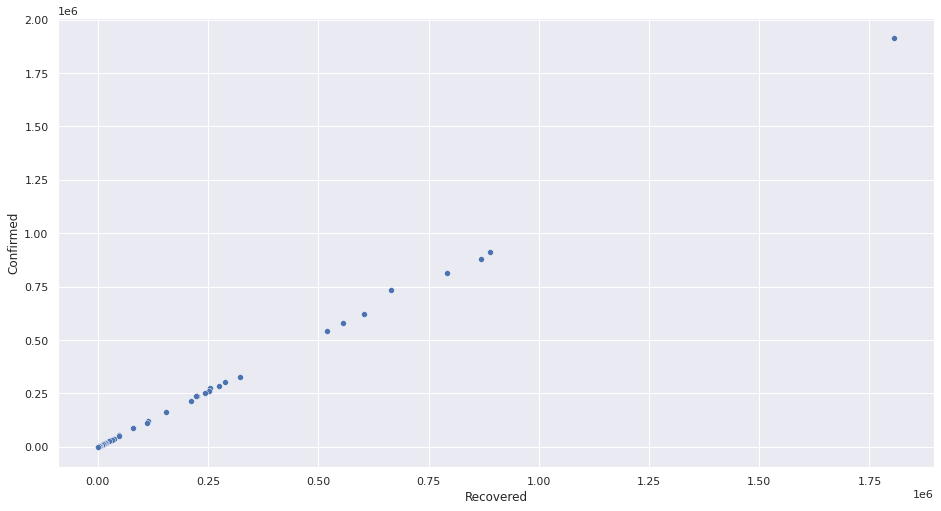

In [ ]:
sns.set(style='darkgrid')
sns.scatterplot(x='Recovered',
                y='Confirmed',
                data=df.iloc[1:])

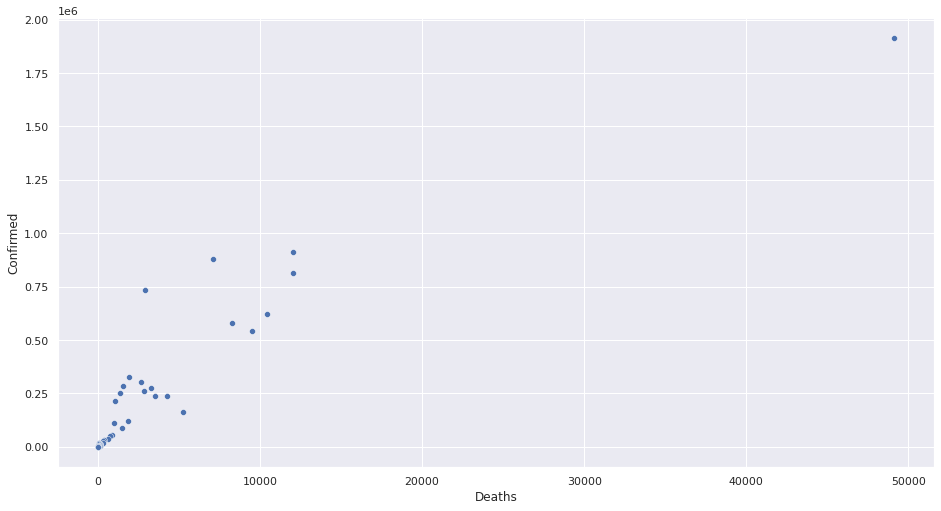

In [ ]:
sns.set(style='darkgrid')
sns.scatterplot(x='Deaths',
                y='Confirmed',
                data=df.iloc[1:])

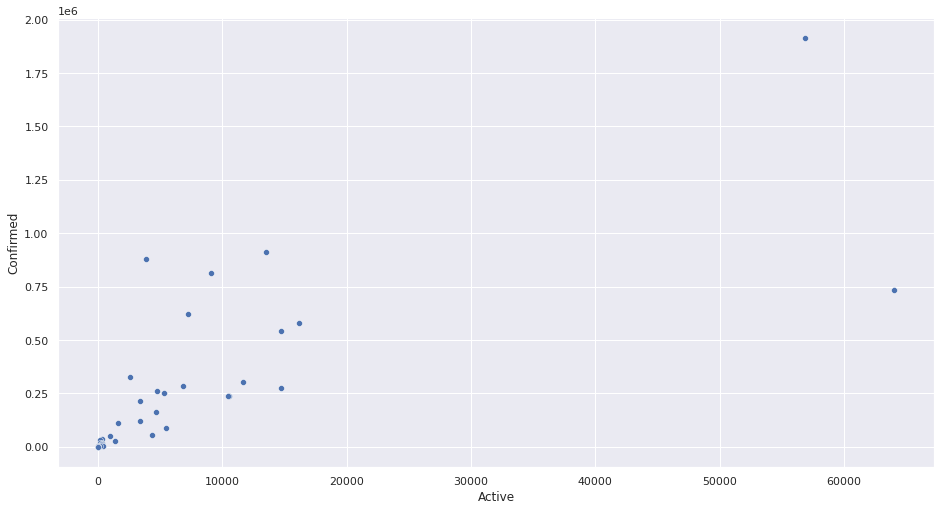

In [ ]:
sns.set(style='darkgrid')
sns.scatterplot(x='Active',
                y='Confirmed',
                data=df.iloc[1:])

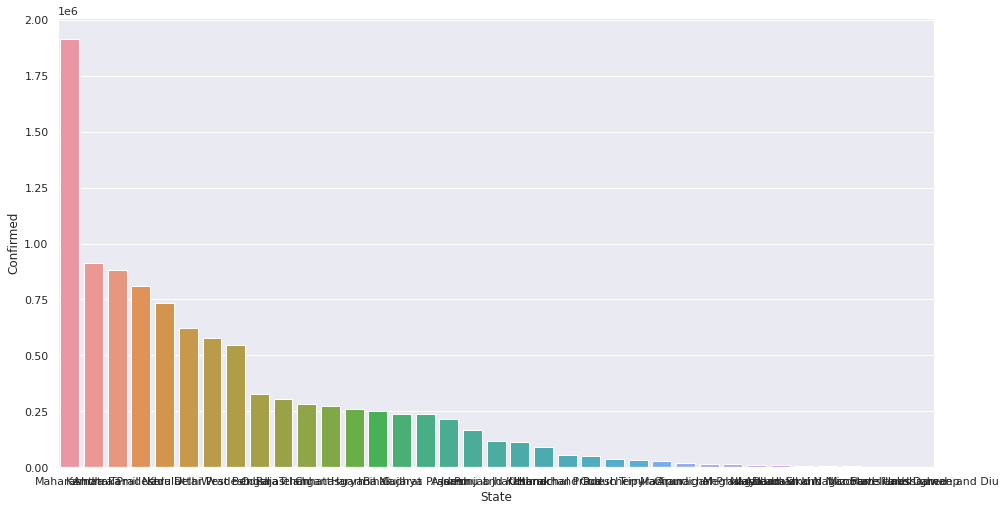

In [ ]:
sns.set(style='darkgrid')
sns.barplot(x='State',
                y='Confirmed',
                data=df.iloc[1:])

# Exploratory Data Analysis

In [ ]:
df=df.iloc[1:]

In [ ]:
df.head()

,State,Unnamed: 1,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population,Density,0-4,2020-05-09 00:00:00,2020-10-14 00:00:00,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+,Health Workers(%)
1,Maharashtra,NaN,1913382,1806298,49129,56823,25-12-2020 22:43,1132,MH,3431,1427,71,NaN,120837347.0,365.0,9362026.0,9820654.0,10734535.0,10627267.0,11090966.0,10147113.0,8796307.0,8247160.0,7196089.0,6032454.0,4919317.0,3885814.0,3642480.0,3078352.0,2143136.0,1062773.0,1180194.0,13.67
2,Karnataka,NaN,914488,888917,12044,13508,25-12-2020 20:23,19,KA,1005,1102,5,NaN,66165886.0,319.0,5046719.0,5241509.0,5736646.0,5827277.0,6052558.0,5771606.0,4698380.0,4695451.0,3826712.0,3519782.0,2699270.0,2142504.0,2060052.0,1520119.0,1061125.0,524426.0,625310.0,5.27
3,Andhra Pradesh,NaN,880430,869478,7091,3861,25-12-2020 19:09,0,AP,355,354,2,NaN,52883163.0,308.0,6284765.0,7304432.0,8201595.0,8093747.0,8132094.0,7799036.0,6584371.0,6507339.0,5399473.0,4657269.0,3657386.0,2909598.0,3199837.0,2167854.0,1519358.0,636989.0,754203.0,7.83
4,Tamil Nadu,NaN,812142,790965,12048,9129,25-12-2020 19:30,0,TN,1027,1103,12,NaN,76481545.0,555.0,5278701.0,5551255.0,6177547.0,6253792.0,6411543.0,6663746.0,5815560.0,5836456.0,5064209.0,4713056.0,3703460.0,3101142.0,2782608.0,1868370.0,1406529.0,710241.0,742010.0,6.72
5,Kerala,NaN,732085,664951,2931,64032,25-12-2020 21:52,171,KL,5397,4506,16,NaN,35330888.0,860.0,2453092.0,2555112.0,2822770.0,2610552.0,2665809.0,2604092.0,2455501.0,2579673.0,2412498.0,2348530.0,1928145.0,1742408.0,1414671.0,1002134.0,733372.0,501367.0,541849.0,6.06


In [ ]:
x=df[['Confirmed','Recovered','Active','Deaths']].values

In [ ]:
x

array([[1913382, 1806298,   56823,   49129],
       [ 914488,  888917,   13508,   12044],
       [ 880430,  869478,    3861,    7091],
       [ 812142,  790965,    9129,   12048],
       [ 732085,  664951,   64032,    2931],
       [ 621439,  603758,    7267,   10414],
       [ 579982,  555544,   16159,    8279],
       [ 544755,  520470,   14749,    9536],
       [ 327867,  323378,    2583,    1906],
       [ 303732,  289375,   11700,    2657],
       [ 284074,  275708,    6839,    1527],
       [ 273279,  255257,   14759,    3263],
       [ 260153,  252545,    4750,    2858],
       [ 249976,  243255,    5347,    1373],
       [ 240105,  225306,   10531,    4268],
       [ 236400,  222403,   10461,    3536],
       [ 215836,  211378,    3422,    1033],
       [ 164821,  154845,    4707,    5269],
       [ 119628,  114353,    3414,    1861],
       [ 113954,  111351,    1587,    1016],
       [  88844,   80738,    5510,    1463],
       [  54058,   48774,    4347,     890],
       [  

# Import Libraries

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

# Using Elbow method find the best value for k

In [ ]:
for i in range(1,5): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(x)
     wcss.append(kmeans.inertia_)

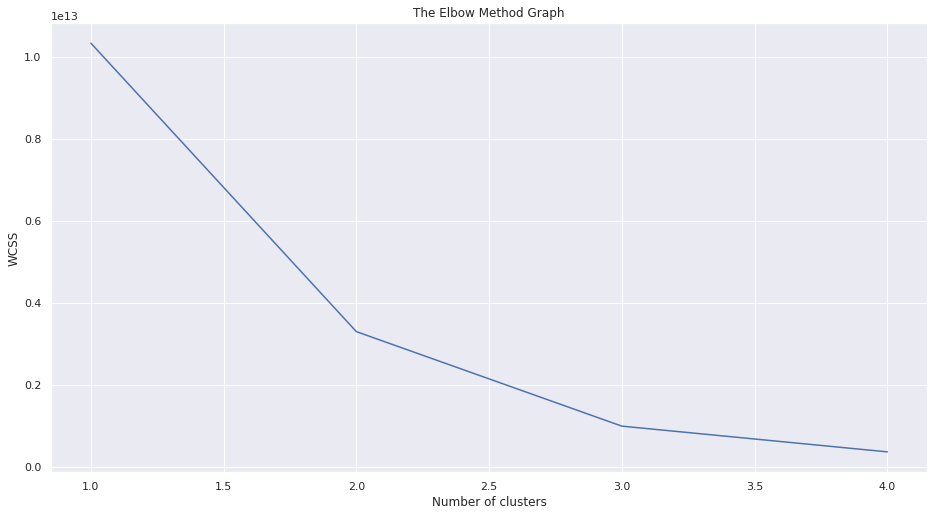

In [ ]:
plt.plot(range(1,5),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## the best value for K is found to 3 from the graph

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

# fit the model

In [ ]:
y_kmeans = kmeans.fit_predict(x)

In [ ]:
y_kmeans

array([2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
type(y_kmeans)


numpy.ndarray

In [ ]:
df.reset_index(inplace=True)


In [ ]:
df.drop(columns='index')

,State,Unnamed: 1,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population,Density,0-4,2020-05-09 00:00:00,2020-10-14 00:00:00,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+,Health Workers(%)
0,Maharashtra,NaN,1913382,1806298,49129,56823,25-12-2020 22:43,1132,MH,3431,1427,71,NaN,120837347.0,365.0,9362026.0,9820654.0,10734535.0,10627267.0,11090966.0,10147113.0,8796307.0,8247160.0,7196089.0,6032454.0,4919317.0,3885814.0,3642480.0,3078352.0,2143136.0,1062773.0,1180194.0,13.67
1,Karnataka,NaN,914488,888917,12044,13508,25-12-2020 20:23,19,KA,1005,1102,5,NaN,66165886.0,319.0,5046719.0,5241509.0,5736646.0,5827277.0,6052558.0,5771606.0,4698380.0,4695451.0,3826712.0,3519782.0,2699270.0,2142504.0,2060052.0,1520119.0,1061125.0,524426.0,625310.0,5.27
2,Andhra Pradesh,NaN,880430,869478,7091,3861,25-12-2020 19:09,0,AP,355,354,2,NaN,52883163.0,308.0,6284765.0,7304432.0,8201595.0,8093747.0,8132094.0,7799036.0,6584371.0,6507339.0,5399473.0,4657269.0,3657386.0,2909598.0,3199837.0,2167854.0,1519358.0,636989.0,754203.0,7.83
3,Tamil Nadu,NaN,812142,790965,12048,9129,25-12-2020 19:30,0,TN,1027,1103,12,NaN,76481545.0,555.0,5278701.0,5551255.0,6177547.0,6253792.0,6411543.0,6663746.0,5815560.0,5836456.0,5064209.0,4713056.0,3703460.0,3101142.0,2782608.0,1868370.0,1406529.0,710241.0,742010.0,6.72
4,Kerala,NaN,732085,664951,2931,64032,25-12-2020 21:52,171,KL,5397,4506,16,NaN,35330888.0,860.0,2453092.0,2555112.0,2822770.0,2610552.0,2665809.0,2604092.0,2455501.0,2579673.0,2412498.0,2348530.0,1928145.0,1742408.0,1414671.0,1002134.0,733372.0,501367.0,541849.0,6.06
5,Delhi,NaN,621439,603758,10414,7267,25-12-2020 20:10,0,DL,758,1370,30,[July 14]: Value for the total tests conducted...,18802494.0,11320.0,1381200.0,1535972.0,1648147.0,1667375.0,1764060.0,1668326.0,1434699.0,1319244.0,1097197.0,911213.0,687469.0,508892.0,472019.0,272452.0,189250.0,100693.0,113031.0,3.22
6,Uttar Pradesh,NaN,579982,555544,8279,16159,25-12-2020 20:10,0,UP,1214,1342,12,NaN,228959599.0,829.0,20376668.0,25061717.0,25869881.0,23040380.0,17578648.0,14579829.0,12954682.0,12556222.0,10231402.0,8449777.0,6587023.0,5464146.0,5705191.0,3839969.0,2832368.0,1249892.0,1812484.0,10.81
7,West Bengal,NaN,544755,520470,9536,14749,25-12-2020 21:52,0,WB,1541,1954,31,NaN,97694960.0,1028.0,7333143.0,8247809.0,9156523.0,9058031.0,8758322.0,7997909.0,6841590.0,7012646.0,6153060.0,5335719.0,4257880.0,3268650.0,2745454.0,1982993.0,1390607.0,739767.0,883561.0,9.44
8,Odisha,NaN,327867,323378,1906,2583,25-12-2020 22:43,0,OR,325,406,3,[July 12th] :20 non-covid deaths reported in s...,45429399.0,270.0,3653029.0,4074768.0,4348625.0,3925398.0,3783527.0,3574037.0,3102991.0,3051188.0,2691474.0,2334030.0,1847812.0,1483720.0,1474061.0,979525.0,768070.0,364800.0,397992.0,3.54
9,Rajasthan,NaN,303732,289375,2657,11700,25-12-2020 19:30,0,RJ,1023,987,7,NaN,78230816.0,200.0,7302170.0,8042738.0,8380518.0,7314017.0,6426494.0,5348497.0,4722683.0,4334564.0,3735355.0,3145404.0,2516808.0,1897449.0,1770139.0,1260376.0,1016915.0,477655.0,587053.0,3.92


In [ ]:
active_index=df[['State']]
active_index.head()

,State
0,Maharashtra
1,Karnataka
2,Andhra Pradesh
3,Tamil Nadu
4,Kerala


In [ ]:
type(active_index)

pandas.core.frame.DataFrame

In [ ]:
index=pd.DataFrame({'index':y_kmeans})
index

,index
0,2
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,0


In [ ]:
active_index=active_index.join(index)

# Predicted Cluster Values

In [ ]:
active_index=active_index.set_index('State')
active_index.head()

,index
State,
Maharashtra,2
Karnataka,1
Andhra Pradesh,1
Tamil Nadu,1
Kerala,1


In [ ]:
active_index.to_json('active_vulnerability_index')

In [ ]:
df.head()

,index,State,Unnamed: 1,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population,Density,0-4,2020-05-09 00:00:00,2020-10-14 00:00:00,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80+,Health Workers(%)
0,1,Maharashtra,NaN,1913382,1806298,49129,56823,25-12-2020 22:43,1132,MH,3431,1427,71,NaN,120837347.0,365.0,9362026.0,9820654.0,10734535.0,10627267.0,11090966.0,10147113.0,8796307.0,8247160.0,7196089.0,6032454.0,4919317.0,3885814.0,3642480.0,3078352.0,2143136.0,1062773.0,1180194.0,13.67
1,2,Karnataka,NaN,914488,888917,12044,13508,25-12-2020 20:23,19,KA,1005,1102,5,NaN,66165886.0,319.0,5046719.0,5241509.0,5736646.0,5827277.0,6052558.0,5771606.0,4698380.0,4695451.0,3826712.0,3519782.0,2699270.0,2142504.0,2060052.0,1520119.0,1061125.0,524426.0,625310.0,5.27
2,3,Andhra Pradesh,NaN,880430,869478,7091,3861,25-12-2020 19:09,0,AP,355,354,2,NaN,52883163.0,308.0,6284765.0,7304432.0,8201595.0,8093747.0,8132094.0,7799036.0,6584371.0,6507339.0,5399473.0,4657269.0,3657386.0,2909598.0,3199837.0,2167854.0,1519358.0,636989.0,754203.0,7.83
3,4,Tamil Nadu,NaN,812142,790965,12048,9129,25-12-2020 19:30,0,TN,1027,1103,12,NaN,76481545.0,555.0,5278701.0,5551255.0,6177547.0,6253792.0,6411543.0,6663746.0,5815560.0,5836456.0,5064209.0,4713056.0,3703460.0,3101142.0,2782608.0,1868370.0,1406529.0,710241.0,742010.0,6.72
4,5,Kerala,NaN,732085,664951,2931,64032,25-12-2020 21:52,171,KL,5397,4506,16,NaN,35330888.0,860.0,2453092.0,2555112.0,2822770.0,2610552.0,2665809.0,2604092.0,2455501.0,2579673.0,2412498.0,2348530.0,1928145.0,1742408.0,1414671.0,1002134.0,733372.0,501367.0,541849.0,6.06


In [ ]:
 for i in range(len(y_kmeans)):
   print(df['State'].iloc[i:i+1],y_kmeans[i])

0    Maharashtra
Name: State, dtype: object 2
1    Karnataka
Name: State, dtype: object 1
2    Andhra Pradesh
Name: State, dtype: object 1
3    Tamil Nadu
Name: State, dtype: object 1
4    Kerala
Name: State, dtype: object 1
5    Delhi
Name: State, dtype: object 1
6    Uttar Pradesh
Name: State, dtype: object 1
7    West Bengal
Name: State, dtype: object 1
8    Odisha
Name: State, dtype: object 0
9    Rajasthan
Name: State, dtype: object 0
10    Telangana
Name: State, dtype: object 0
11    Chhattisgarh
Name: State, dtype: object 0
12    Haryana
Name: State, dtype: object 0
13    Bihar
Name: State, dtype: object 0
14    Gujarat
Name: State, dtype: object 0
15    Madhya Pradesh
Name: State, dtype: object 0
16    Assam
Name: State, dtype: object 0
17    Punjab
Name: State, dtype: object 0
18    Jammu and Kashmir
Name: State, dtype: object 0
19    Jharkhand
Name: State, dtype: object 0
20    Uttarakhand
Name: State, dtype: object 0
21    Himachal Pradesh
Name: State, dtype: object 0
22    

In [ ]:
import json

In [ ]:
with open('./active_vulnerability_index') as f:
        data = json.load(f)

data

{'index': {'Andaman and Nicobar Islands': 0,
  'Andhra Pradesh': 1,
  'Arunachal Pradesh': 0,
  'Assam': 0,
  'Bihar': 0,
  'Chandigarh': 0,
  'Chhattisgarh': 0,
  'Dadra and Nagar Haveli and Daman and Diu': 0,
  'Delhi': 1,
  'Goa': 0,
  'Gujarat': 0,
  'Haryana': 0,
  'Himachal Pradesh': 0,
  'Jammu and Kashmir': 0,
  'Jharkhand': 0,
  'Karnataka': 1,
  'Kerala': 1,
  'Ladakh': 0,
  'Lakshadweep': 0,
  'Madhya Pradesh': 0,
  'Maharashtra': 2,
  'Manipur': 0,
  'Meghalaya': 0,
  'Mizoram': 0,
  'Nagaland': 0,
  'Odisha': 0,
  'Puducherry': 0,
  'Punjab': 0,
  'Rajasthan': 0,
  'Sikkim': 0,
  'State Unassigned': 0,
  'Tamil Nadu': 1,
  'Telangana': 0,
  'Tripura': 0,
  'Uttar Pradesh': 1,
  'Uttarakhand': 0,
  'West Bengal': 1}}